# import library

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms

In [11]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cpu


# Data

In [6]:
transform = torchvision.transforms.Compose([transforms.ToTensor(), 
                                            transforms.Normalize((0), (1.0 / 255.0, ))])
trainset = torchvision.datasets.FashionMNIST(root='data', 
                                            train=True,
                                            download=True,
                                            transform=transform)
train_loader = torch.utils.data.DataLoader(trainset,
                                           batch_size= 1024,
                                           num_workers = 5,
                                           shuffle= True)
testset = torchvision.datasets.FashionMNIST(root='data',
                                            train= False,
                                            download= True,
                                            transform=transform)
test_loader = torch.utils.data.DataLoader(testset, 
                                          batch_size= 1024,
                                          num_workers= 5,
                                          shuffle= False)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

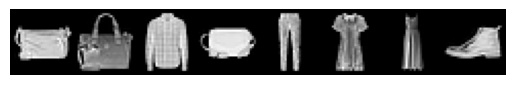

In [9]:
def imshow(img):
    img = img / 255.0
    np_img = img.numpy()
    plt.imshow(np.transpose(np_img, (1,2,0)))
    plt.axis('off')
    plt.show()

for i, (images, labels) in enumerate(train_loader, 0):
    imshow(torchvision.utils.make_grid(images[:8]))
    break

# model

In [13]:
model = torch.nn.Sequential(
    torch.nn.Flatten(),
    torch.nn.Linear(784, 10)
)
model = model.to(device)
print(model)

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=10, bias=True)
)


In [18]:
input_tensor = torch.rand(5, 28, 28).to(device)

output = model(input_tensor)

print(output.shape)

torch.Size([5, 10])


# Loss, optimizer and evaluation function

In [19]:
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.00001)


In [20]:
def evaluate(model, test_loader, criterion):
    model.eval()
    test_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)

            outputs = model(images)
            loss = criterion(outputs, labels)
            test_loss += loss.item()

            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    
    accuracy = 100 * correct/total
    test_loss = test_loss / len(test_loader)
    return test_loss, accuracy

In [21]:
test_loss, test_accuracy = evaluate(model, test_loader, criterion)
print(f'test_loss: {test_loss}')
print(f'test_accuracy: {test_accuracy}')

test_loss: 117.22476577758789
test_accuracy: 2.46


# Train

In [24]:
train_losses = []
train_accuracies = []
test_losses = []
test_accuracies = []
epoch_max = 10


In [25]:
# train
for epoch in range(epoch_max):
    running_loss = 0.0
    running_correct = 0
    total = 0

    for i, (inputs, labels) in enumerate(train_loader, 0):
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        # logits
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        running_loss += loss.item()

        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)

        running_correct += (predicted == labels).sum().item()

        loss.backward()
        optimizer.step()
    
    epoch_accuracy = 100 * running_correct / total
    epoch_loss = running_loss/(i+1)
    test_loss, test_accuracy = evaluate(model, test_loader, criterion)
    print(f"Epoch [{epoch + 1}/{epoch_max}], Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.2f}%, Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.2f}%")

    # plt
    train_losses.append(epoch_loss)
    train_accuracies.append(epoch_accuracy)
    test_losses.append(test_loss)
    test_accuracies.append(test_accuracy)


Epoch [1/10], Loss: 32.5120, Accuracy: 30.41%, Test Loss: 17.7632, Test Accuracy: 42.63%
Epoch [2/10], Loss: 14.8551, Accuracy: 47.86%, Test Loss: 13.3216, Test Accuracy: 51.15%
Epoch [3/10], Loss: 11.8766, Accuracy: 54.56%, Test Loss: 11.2628, Test Accuracy: 56.20%
Epoch [4/10], Loss: 10.3137, Accuracy: 58.34%, Test Loss: 10.0712, Test Accuracy: 59.32%
Epoch [5/10], Loss: 9.3058, Accuracy: 60.84%, Test Loss: 9.2071, Test Accuracy: 61.37%
Epoch [6/10], Loss: 8.5948, Accuracy: 62.83%, Test Loss: 8.5814, Test Accuracy: 63.25%
Epoch [7/10], Loss: 8.0429, Accuracy: 64.30%, Test Loss: 8.1045, Test Accuracy: 64.55%
Epoch [8/10], Loss: 7.6085, Accuracy: 65.68%, Test Loss: 7.7077, Test Accuracy: 65.77%
Epoch [9/10], Loss: 7.2582, Accuracy: 66.68%, Test Loss: 7.3795, Test Accuracy: 67.09%
Epoch [10/10], Loss: 6.9684, Accuracy: 67.51%, Test Loss: 7.1505, Test Accuracy: 67.49%


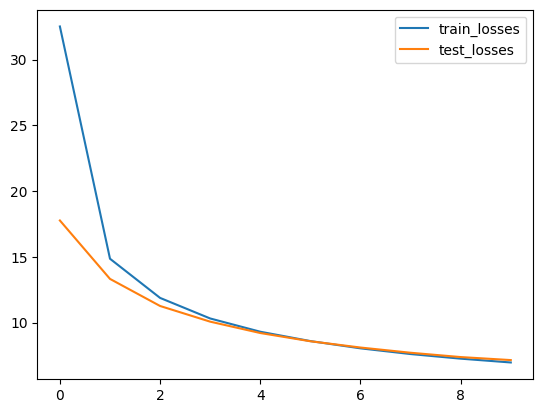

In [30]:
import matplotlib.pyplot as plt

plt.plot(train_losses, label='train_losses')
plt.plot(test_losses, label='test_losses')
plt.legend()

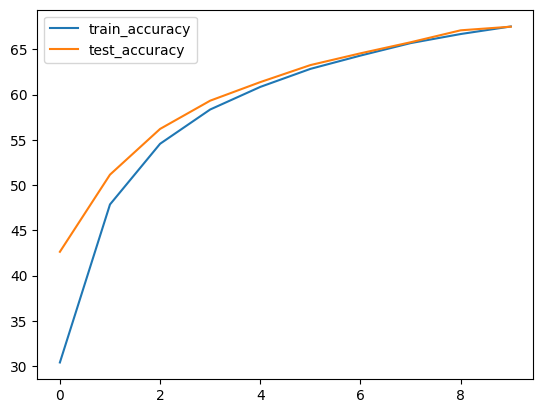

In [31]:
import matplotlib.pyplot as plt

plt.plot(train_accuracies, label='train_accuracy')
plt.plot(test_accuracies, label='test_accuracy')
plt.legend()